In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('burnout/train.csv')
train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [4]:
train.drop(columns = ['Employee ID', 'Date of Joining'], inplace = True)

In [5]:
train['Company Type'].unique()

array(['Service', 'Product'], dtype=object)

In [6]:
train['WFH Setup Available'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
train['Gender'] = train['Gender'].replace({'Male':0, 'Female':1})
train.infer_objects(copy=False)
train['Company Type'] = train['Company Type'].replace({'Service':0, 'Product':1})
train.infer_objects(copy=False)
train['WFH Setup Available'] = train['WFH Setup Available'].replace({'Yes':1, 'No':0})
train.infer_objects(copy=False)
train

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15352\142843159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({'Male':0, 'Female':1})
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15352\142843159.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Company Type'] = train['Company Type'].replace({'Service':0, 'Product':1})
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15352\142843159.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1,0,0,2.0,3.0,3.8,0.16
1,0,0,1,1.0,2.0,5.0,0.36
2,1,1,1,2.0,NaN,5.8,0.49
3,0,0,1,1.0,1.0,2.6,0.20
4,1,0,0,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...
22745,1,0,0,1.0,3.0,NaN,0.41
22746,1,1,1,3.0,6.0,6.7,0.59
22747,0,0,1,3.0,7.0,NaN,0.72
22748,1,0,0,2.0,5.0,5.9,0.52


In [8]:
corr = train.corr()

<Axes: >

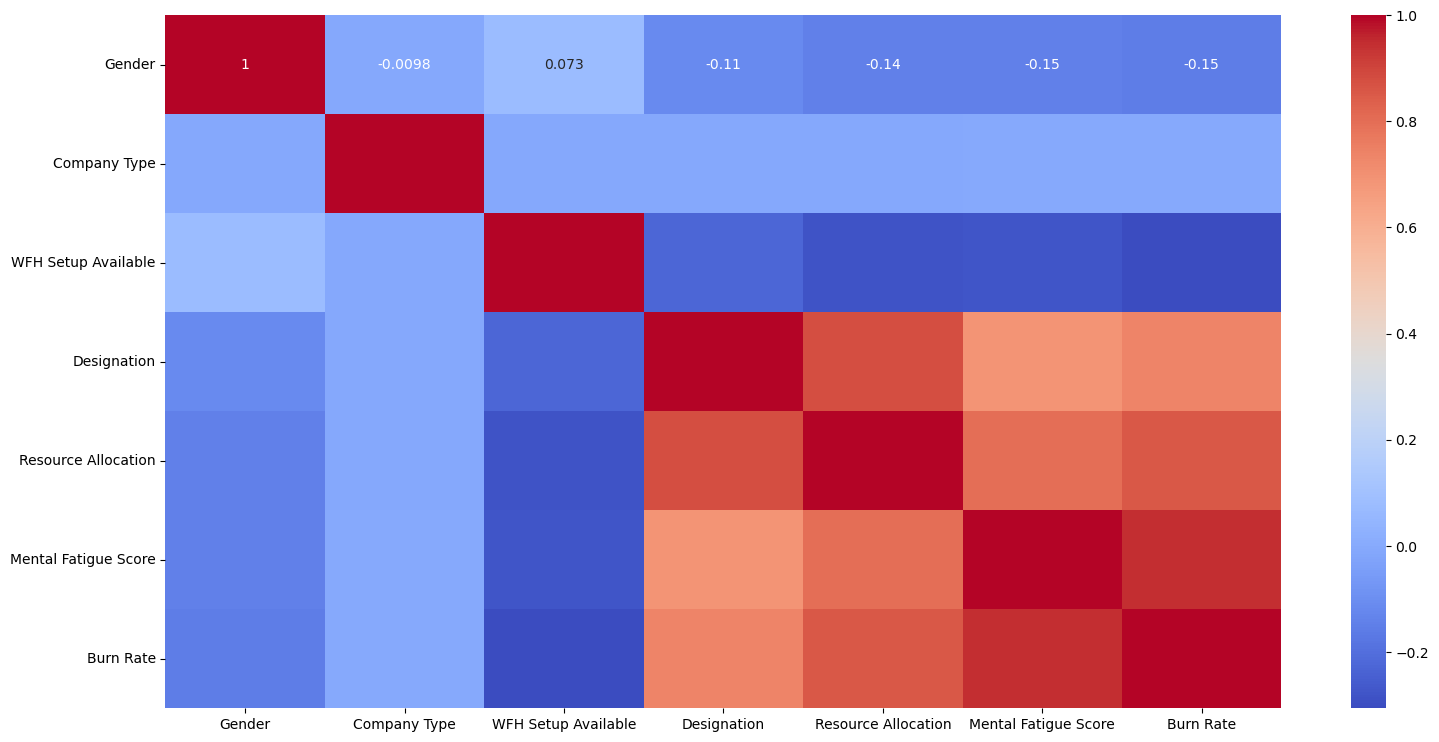

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18, 9))
sns.heatmap(corr, annot=True, cmap= 'coolwarm')

In [10]:
train.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [11]:
train.dropna(subset = ['Resource Allocation'], inplace = True)

In [12]:
avg_mental = train['Mental Fatigue Score'].astype(float).mean(axis = 0)
train['Mental Fatigue Score'].replace(np.nan, avg_mental, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15352\1695035575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Mental Fatigue Score'].replace(np.nan, avg_mental, inplace = True)


In [13]:
avg_Burn = train['Burn Rate'].astype(float).mean(axis = 0)
train['Burn Rate'].replace(np.nan, avg_Burn, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15352\3262879601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Burn Rate'].replace(np.nan, avg_Burn, inplace = True)


In [14]:
X = train.drop(columns = 'Burn Rate')
Y = train['Burn Rate']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 44)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

In [28]:
yhat = lr.predict(x_test)

In [22]:
lr.score(x_test, y_test)

0.8497028348295578